## Cognifyz  Data Analysis

In [1]:
# Importing Libraries 

import pandas as pd  # For Data Manipulation
import numpy as np  
import matplotlib.pyplot as plt # Data Vsualization
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns", None)  # Display all columns


In [2]:
# Reading the Data using pandas 

df = pd.read_csv("Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking Null Values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
# Checking Duplicates

df.duplicated().sum()

0

In [5]:
# Other Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
# Statistical Summary

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Data Cleaning

In [7]:
def remove_spc_character(df, column, spc_charac):
        # This Function remove the character from the column and return dataset
        for col in column:
            for char in spc_charac:
                df[col] = df[col].str.replace(char,"")
        return df

In [8]:
# There are some special character that are inappropriate we need to remove them to clean the data
columns = df.select_dtypes(include="O").columns

spc_character = ["�", "��","�_","_"]

In [9]:
df = remove_spc_character(df, columns, spc_character)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, R۱ht۱m Cadd...",Karaky,"Karaky, stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac۱,208,stanbul,"Kouyolu Mahallesi, Muhittin stnda Caddesi, No ...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 56...",Kurueme,"Kurueme, stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 64...",Kurueme,"Kurueme, stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## Task List

### Level 3

### Task 1 -Restaurant Reviews

### Q1. Analyze the text reviews to identify the most common positive and negative keywords.

In [10]:
df['Sentiment'] = df['Rating text'].apply(lambda x: "Negative" if x in ['Not rated', 'Poor'] else ("Neutral" if x == "Average" else "Positive"))


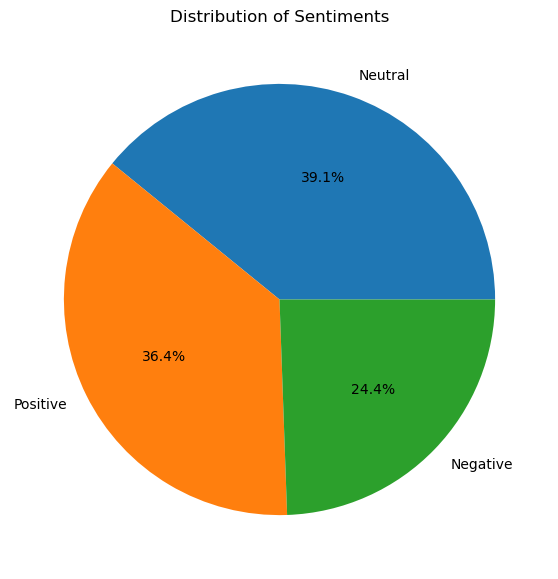

In [11]:
sentiments = df['Sentiment'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(sentiments, labels=sentiments.index, autopct='%1.1f%%')
plt.title("Distribution of Sentiments")
plt.show()

### It has been seen that Restaurants with Average review is more than others followed by Positive reviews.

### Q2.Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [12]:
avg_review_length = df['Rating text'].apply(len).mean()
print("Average Review Length:", avg_review_length)

Average Review Length: 7.020730813527379


In [13]:
relationship = df.groupby("Aggregate rating")['Rating text'].apply(lambda x : x.apply(len).mean())
print("\nRelationship between Review Length and Rating:")
print(relationship)


Relationship between Review Length and Rating:
Aggregate rating
0.0    9.0
1.8    4.0
1.9    4.0
2.0    4.0
2.1    4.0
2.2    4.0
2.3    4.0
2.4    4.0
2.5    7.0
2.6    7.0
2.7    7.0
2.8    7.0
2.9    7.0
3.0    7.0
3.1    7.0
3.2    7.0
3.3    7.0
3.4    7.0
3.5    4.0
3.6    4.0
3.7    4.0
3.8    4.0
3.9    4.0
4.0    9.0
4.1    9.0
4.2    9.0
4.3    9.0
4.4    9.0
4.5    9.0
4.6    9.0
4.7    9.0
4.8    9.0
4.9    9.0
Name: Rating text, dtype: float64


### Task 2 - Votes Analysis

### Q1. Identify the restaurants with the highest and lowest number of votes.

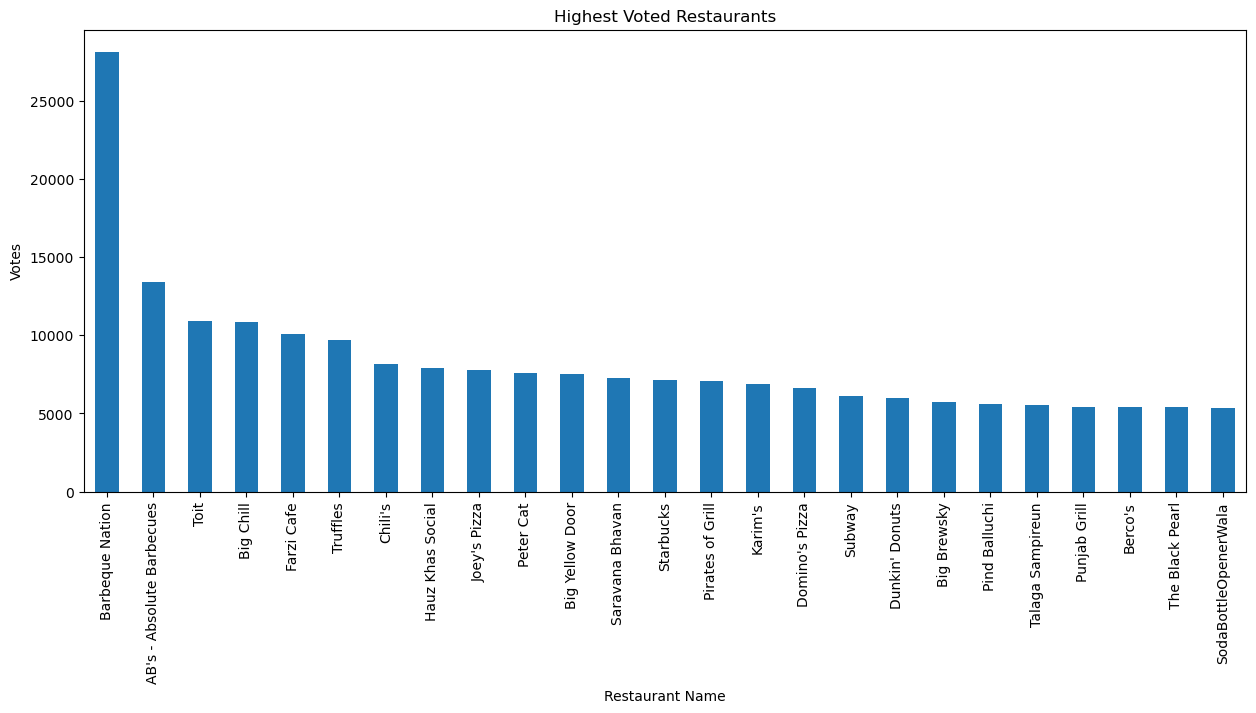

In [14]:
highest_votes = df.groupby("Restaurant Name")['Votes'].sum().sort_values(ascending=False).nlargest(25)
plt.figure(figsize=(15,6))
highest_votes.plot(kind="bar")
plt.title("Highest Voted Restaurants")
plt.ylabel("Votes")
plt.show()

### Barbeque Nation Has Highest voted Restaurant followed by AB's Absolute Barbecues.

In [15]:
lowest_votes = df.groupby(["Restaurant Name","Rating text","Aggregate rating"])['Votes'].sum().sort_values().reset_index()
lowest_votes

,Restaurant Name,Rating text,Aggregate rating,Votes
0,Chennai Express Greens,Not rated,0.0,0
1,M Crme,Not rated,0.0,0
2,Sharma Sweets,Not rated,0.0,0
3,MK's Chinese Food,Not rated,0.0,0
4,Night Munchies,Not rated,0.0,0
...,...,...,...,...
8707,Peter Cat,Very Good,4.3,7574
8708,Hauz Khas Social,Very Good,4.3,7931
8709,Barbeque Nation,Excellent,4.9,9064
8710,Truffles,Excellent,4.7,9667


In [16]:
lowest_not_rated =lowest_votes[(lowest_votes['Votes'] < 10) & (lowest_votes['Rating text'].isin(['Poor','Not rated']))]
lowest_not_rated['Restaurant Name'].count()

1947

### There are 1947 restaurants that have votes less than 10 and there rating text is poor and Not rated 

### Q2. Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [17]:
correlation=df['Aggregate rating'].corr(df['Votes'])

print(f"Correlation coefficient between Aggregate rating and Votes: {correlation:.2f}")


Correlation coefficient between Aggregate rating and Votes: 0.31


### There is a positive correlation between the number of votes and the rating.

### Task 3 - Price Range vs. Online Delivery and Table Booking

### Q1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [18]:
df.groupby(["Price range"]).agg({"Has Table booking":pd.Series.value_counts,"Has Online delivery":pd.Series.value_counts})

,Has Table booking,Has Online delivery
Price range,,
1,"[4443, 1]","[3743, 701]"
2,"[2874, 239]","[1827, 1286]"
3,"[764, 644]","[997, 411]"
4,"[312, 274]","[533, 53]"


### As restaurant prices increase, more higher-priced ones tend to offer both table booking and online delivery services. Meanwhile, lower-priced restaurants often focus on providing online delivery or might not offer these services at all. This hints at a relationship between restaurant pricing and the range of services they provide.

### Q2.Determine if higher-priced restaurants are more likely to offer these services.

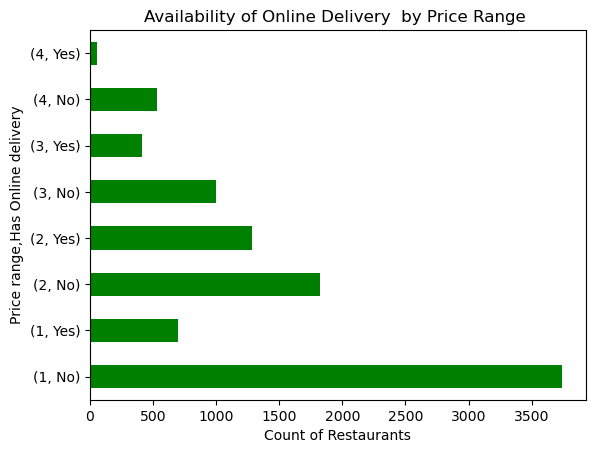

In [19]:
df.groupby("Price range")['Has Online delivery'].value_counts().plot(kind="barh", color="g")
plt.title("Availability of Online Delivery  by Price Range ")
plt.xlabel("Count of Restaurants")
plt.show()

### We can clearly see that Restaurants has not offered Online Delivery is more than that of Resturants has offered Online Delivery

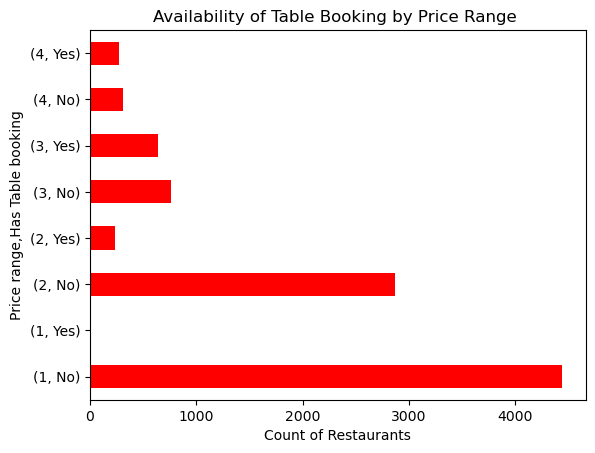

In [20]:
df.groupby("Price range")['Has Table booking'].value_counts().plot(kind = "barh",color="r")
plt.title("Availability of Table Booking by Price Range ")
plt.xlabel("Count of Restaurants")
plt.show()

### Availability of Table booking is offered in higher price range is more than that of lower price range Restaurants.

### These insights highlight that while online delivery services are less common across all price ranges, table booking services exhibit a clear relationship with price range, being more prevalent in higher-priced restaurants compared to lower-priced ones. This trend suggests that higher-priced restaurants prioritize table booking as part of their service offerings.